# Scientific Python

Base Python is great and has been around nearly 30 years. The power of python lies within the use of community built modules that lay on top of the core python programming language. These modules are abstract code designed to maximize the usefulness of OOP tools by providing advanced functions and methods to the objects in a program. What makes it powerful for scientific applications are the various libararies that have been written to work with scientific (and other) datasets. There is a great [graphic](https://fabienmaussion.info/acinn_python_workshop/figures/scipy_ecosystem.png) developed by Jake Vanderplas in 2015 and reproduced below to illustrate the structure of scientific Python libraries. At the base is the language itself, then the first tier libraries that are built off of the language, then packages that build upon both the language and the first tier libraries, and so on.

![scientific python](https://fabienmaussion.info/acinn_python_workshop/figures/scipy_ecosystem.png)

## Arrays in Python using the Numpy Library

<span style="color:red">REF: DeCaria Chapter 7</span>

Numpy is a key library used in meteorology as it deals well (and quickly) with array manipulations and these arrays work similarly to those we discussed in the Fortran language. This notebook will introduce you to the numpy module and many of its useful functions, as well as continuing to develop your Python language skills.

## Importing Libraries/Modules
In order to use a librbary/module within your program you need to first tell the computer to bring it in! The way that this happens is with an import statement. However, it is common to give the module a handle, so that any similar named functions (e.g., a maximum function) that are in different modules, don't overlap!

An example of an import statement for numpy is below. The common practice is to call the handle for the numpy module 'np'.

Numpy Quickstart: https://numpy.org/doc/stable/user/quickstart.html

In [1]:
import numpy as np

If you have run the above cell, it appears that nothing has happened, but actually a lot has. You have just imported all of the functions that are contained within the numpy module, sitting in the background ready for you to get to work on some data!

## Creating Arrays
The ndarray object is general array object that works for 1D, 2D, and higher dimensional arrays. The most common arrays are 1D (time series), 2D (table), 3D (cube), 4D (series of cubes).

How can we make a Numpy array?

In [1]:
#Convert list to numpy array


Making a 2D array from a nested list.

In [2]:
list2d = [[41.5, - 88.1],
          [42  , -101.5],
          [55  , - 91.3],
          [22.5, -142.2]]


#     row1]         [row 2] ...
# col1    col2   col1  col2 ...  

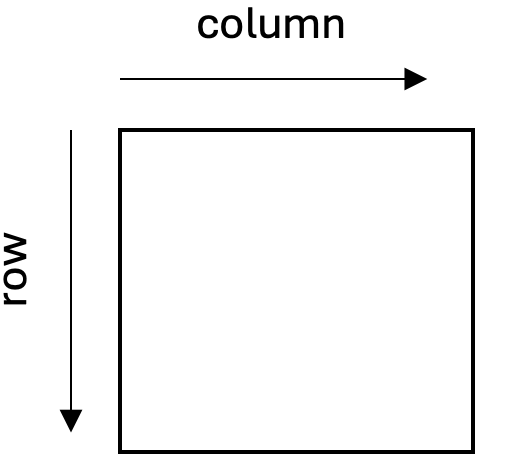

In [3]:
#Slice and Dice


In [4]:
#Like tuples and lists you can use the ':' - here for the entire rows and/or columns


In [5]:
#Can we assign lat=? 
# list2d = [[41.5, - 88.1],
#           [42  , -101.5],
#           [55  , - 91.3],
#           [22.5, -142.2]]


In [6]:
#Extract elements from sublists


## Numpy Object
Must all be the same type - no mixing list ordinary Python lists. This is what allows Numpy to be fast and allow mathematical operations to work on every array element at once.

Valid Object Types:
* `np.float64` - floating point number
* `np.int64` - integer number
* `np.complex` - complex number
* `np.bool` - boolean (True/False)

You can change the type of an array with a simple method call, `.astype()`.

```python
e = d.astype('float64')
```

In [7]:
#Cut and paste code above


In [8]:
#Try float of single element 


In [9]:
#Check array data type  (Not to be confused with type command on lists, tuples and variables)


In [10]:
#Try complex and Bool!


## Working with Data with Numpy helps

While seeing the data printed out is great, its hard to determine how the data is actually stored. Luckily for us, numpy has some great functions that we can use to investigate the arrays. One of the most helpful is attribute attached to a numpy array called [`shape`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html). Execute the link to see what the command yields.

REF: DeCaria Chapter 7

In [11]:
# Print shape attribute for numpy arrays we created


In [12]:
#FYI You can use 'unpacking' to dump out the results of these functions


The <span style="font-family:Courier">**shape**</span> attribute gives us a tuple value that tells us about the shape of the array `[row, col]` (or the number of index values for each element of the array). In this case how many rows and columns. So similar to Fortran, numpy reads the data into an array where the first element is the row index and the second is the column index.

But we don't have to print out the whole array at one time. We can slice and dice the data any way that we desire using an array call and telling the program what element(s) we want out of our array.

### NOTE: Python uses zero-based arrays
This is done because the number line actually goes from zero to nine [0,1,2,3,4,5,6,7,8,9] and **_not_** [1,2,3,4,5,6,7,8,9,10]

So.... <br> <span style="font-family:Courier">
1st element -> 0 <br>
2nd element -> 1 <br>
3rd element -> 2 <br>
. <br>
. <br>
. <br>
nth element -> n-1 <br> </span>

REF: DeCaria Section 7.7

In [15]:
temps = np.array([80, 74, 72, 71, 69, 62, 58, 55, 61, 62, 64, 63])

# Given the temps array, print the temperature that is 62.


In [ ]:
# Update the temperature at the 6th element of the temp array to be 60


In [13]:
locations = [[41.5, -88.1],
             [42, -101.5],
             [55, -91.3],
             [22.5, -142.2]]


# Given the 2D array, where each row contains a lat/lon location of a city, print the longitude of the third city in the array.


## Array range operation
We can also specify a range of values to use, instead of all or just a single element. However, we must note the Python behavior for this action (which we already saw in a previous lecture with the range function. To summarize:

<span style="font-family:Courier">
[0:2] is 0, 1    ->  mathematically we would write the set of numbers as [0,2) <br>
[0:3] is 0, 1, 2 ->  mathematically we would write the set of numbers as [0,3) <br>
[1:4] is 1, 2, 3 ->  mathematically we would write the set of numbers as [1,4) <br>
</span>

This can be used in one or both (or for however many elements) that the array contains.

So lets construct an array call that looks for the months June, July, and August for 1960 - 1980

In [14]:
# Print the first five values from the temps array


In [15]:
# Print the lat/lon locations for the second and third cities from the city_locations array


## Mathematical Operations with Arrays

The power of Numpy arrays is in the ability to do vectoried mathematical operations. This idea of vectorized operations means that we don't have to loop over each element of a list separately to compute new values, but rather that Numpy will do that implicitly in the background and appear to operate on all elements simultaneously. For example,

Traditional program looping:
```python
%%timeit
n = 1000000
d = 1000*np.random.random(n) - 500
diff = np.zeros(n-1)

for i in range(0, len(diff)):
    diff[i] = d[i+1] - d[i]
```
```
300 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
```
Python Vectorized Calculation (implicit looping)
```python
%%timeit
diff[0:n-1] = d[1:n] - d[0:n-1]
```
```
3.14 ms ± 35.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
```
The implicit looping with Numpy is 100 time faster than running a loop!


All of the common mathematical operations from Python work on Numpy arrays for addition, subtraction, multiplication, division, exponentiation, etc.

```python
x = np.array(list(range(-5, 6)))
y = x**2
print(y)
```
Output:
```
[25 16 9 4 1 0 1 4 9 16 25]
```

In [ ]:
# Add 10 to the temps array and print array to screen


In [ ]:
# Divide the temps array by 2 and print array to screen


In [ ]:
# Multiply the 3rd element of the temps array by 1.25 and print array to screen


In [ ]:
# Subtract 12.2 from the temps array and print array to screen


In [ ]:
# Add one degree of latitude to the city_locations array and print array to screen


## Exercise
Create a Numpy array from a list of values representing five exam grades of 78, 83, and 92. After you have created the array, add a five point curve to the first grade, add a two point curve to the second grade, and calculate the average exam grade after the curves were applied.